In [1]:
!pip install np_utils

import pandas as pd
import numpy as np
import re
import nltk
import string

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk import word_tokenize

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import OrderedDict

from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dropout


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RanggaSaputra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Data_Posting_IG_Bersih.csv')
df

,pk_user,pk_media,username,fullname,taken_at,caption,bersih1,Label
0,51245593696,3.030000e+18,denisechariesta91,Denise Chariesta,2023-02-01 15:50:44+00:00,Ud pada pesen PO bunga valentine dari @fleurde...,Ud pesen PO bunga valentine fleurdedc jakarta ...,Promosi
1,51245593696,3.010000e+18,denisechariesta91,Denise Chariesta,2023-01-01 06:10:32+00:00,Maafin ninis ya pi baru inget papi pas lagi su...,Maafin ninis ya pi inget papi pas susah doang ...,Kehidupan Pribadi
2,51245593696,3.010000e+18,denisechariesta91,Denise Chariesta,2023-01-02 08:56:41+00:00,Selama 4 tahun gak perna kepikir untuk ajak ma...,Selama gak perna kepikir ajak mama jalan nya t...,Kehidupan Pribadi
3,51245593696,3.040000e+18,denisechariesta91,Denise Chariesta,2023-02-24 02:17:07+00:00,Pemandangan nya bagus yaa?? Udah cocok untuk l...,Pemandangan nya bagus yaa Udah cocok lokasi fo...,Kehidupan Pribadi
4,51245593696,3.040000e+18,denisechariesta91,Denise Chariesta,2023-02-23 13:09:44+00:00,Love beruang ❤️🐻,Love beruang,Kehidupan Pribadi
...,...,...,...,...,...,...,...,...
195,5371286272,2.430000e+18,hafifarhans,De_Farhana,2020-10-27 13:24:44+00:00,Wegodev competition : \nMake template with boo...,Wegodev competition Make template with bootstr...,Kehidupan Pribadi
196,5371286272,2.400000e+18,hafifarhans,De_Farhana,2020-09-15 11:41:48+00:00,Semakin dewasa bakal semakin ruwet😁tetap seman...,Semakin dewasa ruwettetap semangat,Kehidupan Pribadi
197,5371286272,2.240000e+18,hafifarhans,De_Farhana,2020-02-15 15:04:54+00:00,😊,NaN,Kehidupan Pribadi
198,5371286272,2.210000e+18,hafifarhans,De_Farhana,2020-01-01 12:13:11+00:00,Sukses bro😁✌,Sukses bro,Kehidupan Pribadi


In [3]:
df.dropna(axis=0, subset=['bersih1'], inplace=True)
df

,pk_user,pk_media,username,fullname,taken_at,caption,bersih1,Label
0,51245593696,3.030000e+18,denisechariesta91,Denise Chariesta,2023-02-01 15:50:44+00:00,Ud pada pesen PO bunga valentine dari @fleurde...,Ud pesen PO bunga valentine fleurdedc jakarta ...,Promosi
1,51245593696,3.010000e+18,denisechariesta91,Denise Chariesta,2023-01-01 06:10:32+00:00,Maafin ninis ya pi baru inget papi pas lagi su...,Maafin ninis ya pi inget papi pas susah doang ...,Kehidupan Pribadi
2,51245593696,3.010000e+18,denisechariesta91,Denise Chariesta,2023-01-02 08:56:41+00:00,Selama 4 tahun gak perna kepikir untuk ajak ma...,Selama gak perna kepikir ajak mama jalan nya t...,Kehidupan Pribadi
3,51245593696,3.040000e+18,denisechariesta91,Denise Chariesta,2023-02-24 02:17:07+00:00,Pemandangan nya bagus yaa?? Udah cocok untuk l...,Pemandangan nya bagus yaa Udah cocok lokasi fo...,Kehidupan Pribadi
4,51245593696,3.040000e+18,denisechariesta91,Denise Chariesta,2023-02-23 13:09:44+00:00,Love beruang ❤️🐻,Love beruang,Kehidupan Pribadi
...,...,...,...,...,...,...,...,...
194,5371286272,2.530000e+18,hafifarhans,De_Farhana,2021-03-22 00:33:23+00:00,Buat pengalaman,Buat pengalaman,Kehidupan Pribadi
195,5371286272,2.430000e+18,hafifarhans,De_Farhana,2020-10-27 13:24:44+00:00,Wegodev competition : \nMake template with boo...,Wegodev competition Make template with bootstr...,Kehidupan Pribadi
196,5371286272,2.400000e+18,hafifarhans,De_Farhana,2020-09-15 11:41:48+00:00,Semakin dewasa bakal semakin ruwet😁tetap seman...,Semakin dewasa ruwettetap semangat,Kehidupan Pribadi
198,5371286272,2.210000e+18,hafifarhans,De_Farhana,2020-01-01 12:13:11+00:00,Sukses bro😁✌,Sukses bro,Kehidupan Pribadi


In [4]:
data = df[['bersih1', 'Label']]
data

,bersih1,Label
0,Ud pesen PO bunga valentine fleurdedc jakarta ...,Promosi
1,Maafin ninis ya pi inget papi pas susah doang ...,Kehidupan Pribadi
2,Selama gak perna kepikir ajak mama jalan nya t...,Kehidupan Pribadi
3,Pemandangan nya bagus yaa Udah cocok lokasi fo...,Kehidupan Pribadi
4,Love beruang,Kehidupan Pribadi
...,...,...
194,Buat pengalaman,Kehidupan Pribadi
195,Wegodev competition Make template with bootstr...,Kehidupan Pribadi
196,Semakin dewasa ruwettetap semangat,Kehidupan Pribadi
198,Sukses bro,Kehidupan Pribadi


In [5]:
def example_data (index):
    exam = data[data.index == index][['bersih1', 'Label']].values[0]
    if len(exam) > 0:
        print(exam[0])
        print()
        print('Category:', exam[1])

In [6]:
example_data(4)

Love beruang

Category: Kehidupan Pribadi


In [7]:
#check label distribution
data['Label'].value_counts()

Kehidupan Pribadi    138
Promosi               45
Sarkas/Sindiran        4
Name: Label, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [9]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences



MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

# Tokenize input texts
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(data['bersih1'].values)
word_index = tokenizer.word_index

# Convert input texts to sequences and pad them
X = tokenizer.texts_to_sequences(data['bersih1'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor : ', X.shape)

Shape of data tensor :  (187, 250)


In [10]:
X

array([[   0,    0,    0, ...,  513,  242,  243],
       [   0,    0,    0, ...,   69,   69,  524],
       [   0,    0,    0, ...,  536,  537,   70],
       ...,
       [   0,    0,    0, ..., 1708, 1709,   75],
       [   0,    0,    0, ...,    0, 1710,  163],
       [   0,    0,    0, ..., 1711, 1712, 1713]])

In [11]:
Y = pd.get_dummies(data['Label']).values
print('Shape of label tensors: ', Y.shape)

Shape of label tensors:  (187, 3)


In [12]:
#Handling imbalance data
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(k_neighbors=3, random_state=4).fit_resample(X, Y)

In [13]:
len(y_resampled)

414

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_train.shape, y_train.shape)

(82, 250) (82, 3)
(82, 250) (82, 3)


In [46]:
import tensorflow as tf

class EarlyStopping(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Stops training when 95% accuracy is reached
    '''
    # Get the current accuracy and check if it is above 95% 
    #if(logs.get('accuracy') > 0.95):
    if(logs.get('val_accuracy') > 0.80):

      # Stop training if condition is met
      print("\nThreshold reached. Stopping training...")
      self.model.stop_training = True

early_stopping = EarlyStopping()

In [47]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1])) 
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, input_shape=(X.shape[1], EMBEDDING_DIM))) 
model.add(Dense(3, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________


In [48]:
'''import tensorflow as tf
tf.config.run_functions_eagerly(True)'''

history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.1,)

Epoch 1/50
2/2 [==============================] - 14s 2s/step - loss: 1.1000 - accuracy: 0.3231 - val_loss: 1.0579 - val_accuracy: 0.5294
Epoch 2/50
2/2 [==============================] - 4s 855ms/step - loss: 0.9963 - accuracy: 0.8462 - val_loss: 0.9598 - val_accuracy: 0.4706
Epoch 3/50
2/2 [==============================] - 4s 708ms/step - loss: 0.6302 - accuracy: 0.8154 - val_loss: 2.0110 - val_accuracy: 0.2941
Epoch 4/50
2/2 [==============================] - 4s 860ms/step - loss: 1.3515 - accuracy: 0.4308 - val_loss: 2.4081 - val_accuracy: 0.4118
Epoch 5/50
2/2 [==============================] - 4s 689ms/step - loss: 1.8068 - accuracy: 0.6154 - val_loss: 1.1954 - val_accuracy: 0.4118
Epoch 6/50
2/2 [==============================] - 4s 725ms/step - loss: 0.2117 - accuracy: 0.9692 - val_loss: 0.9734 - val_accuracy: 0.6471
Epoch 7/50
2/2 [==============================] - 4s 595ms/step - loss: 0.1887 - accuracy: 1.0000 - val_loss: 0.9608 - val_accuracy: 0.6471
Epoch 8/50
2/2 [======

In [49]:
import matplotlib.pyplot as plt
from plotly.offline import iplot
import seaborn as sns

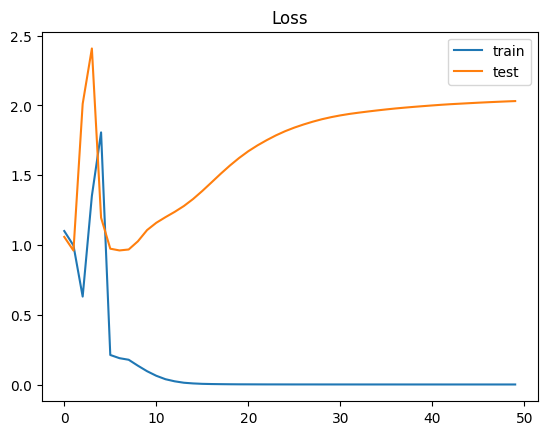

In [50]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

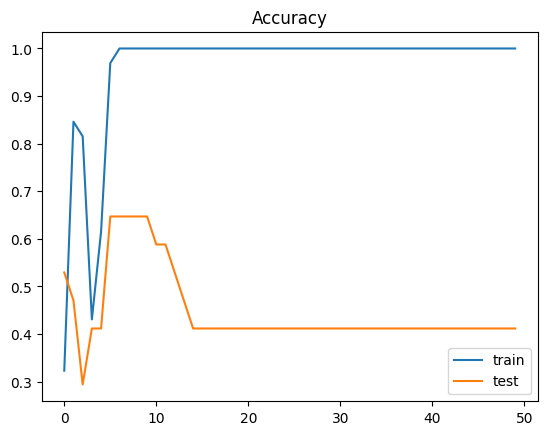

In [51]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [52]:
teks = ['Nikmat kopi disenja']
seq = tokenizer.texts_to_sequences(teks)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
label = ['Kehidupan Pribadi', 'Promosi', 'Sarkas/Sindiran']
print(pred, label[np.argmax(pred)])

1/1 [==============================] - 1s 927ms/step
[[0.7103702  0.22509718 0.06453265]] Kehidupan Pribadi


In [53]:
d = {'id_user': [24218829, 24239210, 21346929], 'username': ['ilexuz', 'chana', 'AriaSalt'], 'Caption':[ '[kembali] Rabu kemarin, 22 Februari 2023 saya berkesempatan tampil dalam acara Sastra Reboan. Saya menampilkan dramatisasi puisi berjudul Wisuda Putri karya A. Slamet Widodo. Puisi tersebut saya bacakan di depan penyairnya langsung dan puluhan sastrawan terkemuka. Acara ini selain diskusi sastra, ternyata juga peluncuran buku antologi puisi karya penyair yang sama. Puisi-puisinya jujur, Pak Slamet menggunakan puisi sebagai media bercerita. Mulai dari politik, isu pendidikan, hingga nikmatnya malam pertama (katanya).Momen ini mengingatkan saya pada 4 tahun lalu saat tampil di Teater Kecil Taman Ismail Marzuki. Saya kira, kesempatan besar itu hanya sekali dan terakhir tampil di panggung yang saya idamkan, panggung Ismail Marzuki. Alhamdulillah, menginjak tahun ketiga perkuliahan, saya kembali berperan di sana, dengan perasaan yang masih sama, beribu bahagia.','Pekerjaan di dunia data yang namanya mirip mirip emang suka bikin bingung!🥴😥', 'Love kamu sayang']}
df = pd.DataFrame(data=d)
df

,id_user,username,Caption
0,24218829,ilexuz,"[kembali] Rabu kemarin, 22 Februari 2023 saya ..."
1,24239210,chana,Pekerjaan di dunia data yang namanya mirip mir...
2,21346929,AriaSalt,Love kamu sayang


In [54]:
def clear(caption):
    #remove angka
    caption = re.sub('[0-9]+', '', str(caption))

    # remove hyperlinks
    caption = re.sub(r'https?:\/\/\S+', '', str(caption))
    
    # remove hashtags
    caption = re.sub(r'#[A-Za-z0-9_]+', '', str(caption))

    # remove symbol
    caption = re.sub(r'[^\x00-\x7f]', '', str(caption))

    #remove coma
    caption = re.sub(r',',' ', str(caption))
    
    #remove double huruf
    captions = ''.join(OrderedDict.fromkeys(caption))
    
    #remove punctuation
    caption = re.sub(r'[^\w\s]', '', str(caption))
    
    return caption

In [55]:
df['bersih1'] = df['Caption'].apply(lambda x: clear(x))
df

,id_user,username,Caption,bersih1
0,24218829,ilexuz,"[kembali] Rabu kemarin, 22 Februari 2023 saya ...",kembali Rabu kemarin Februari saya berkesem...
1,24239210,chana,Pekerjaan di dunia data yang namanya mirip mir...,Pekerjaan di dunia data yang namanya mirip mir...
2,21346929,AriaSalt,Love kamu sayang,Love kamu sayang


In [56]:
# oleh Tala, F.z (2003)
stopwords_buatan=['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya',
     'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila',
     'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya',
     'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya',
     'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah',
     'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah',
     'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah',
     'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya',
     'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu',
     'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama',
     'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa',
     'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah',
     'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya', 'bulan', 'bung', 'cara', 'caranya', 'cukup',
     'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi',
     'demikian', 'demikianlah', 'dengan', 'dng', 'dg', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara',
     'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan',
     'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya',
     'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan',
     'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan',
     'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya',
     'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan',
     'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah',
     'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki',
     'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya',
     'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal',
     'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga',
     'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah',
     'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jngn', 'jng', 'jgn', 'jangankan',
     'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau',
     'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu',
     'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'krn', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah',
     'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan',
     'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada',
     'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah',
     'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu',
     'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin',
     'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih',
     'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya',
     'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan',
     'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan',
     'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti',
     'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang',
     'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai',
     'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat',
     'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab',
     'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan',
     'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah',
     'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula',
     'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris',
     'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti',
     'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan',
     'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa',
     'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai',
     'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya',
     'sebagai', 'sbg', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak',
     'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya',
     'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit',
     'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh',
     'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun',
     'sekarang', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya',
     'sekurangnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh',
     'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya',
     'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya',
     'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti',
     'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera',
     'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah',
     'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu',
     'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah',
     'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya',
     'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat',
     'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu',
     'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya',
     'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah',
     'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tidak', 'tidakkah',
     'tidaklah', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya',
     'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya',
     'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang','yg']

In [57]:
#Remove Mention
df['bersih1'] = df['bersih1'].str.replace('@\S+', ' ', case=False)

#Remove extra whitespace
df['bersih1'] = df['bersih1'].str.replace("\s(2)", ' ', case=False)

df['bersih1'] = df['bersih1'].str.replace('[^a-zA-Z \n\.]'," ")

df['bersih1'] = df['bersih1'].str.replace('\n'," ")

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_4320\2405909112.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_4320\2405909112.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_4320\2405909112.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



In [58]:
#=========================================================================#
#import stopword
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')

df['bersih1'] = df['bersih1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_buatan)]))
#=========================================================================#
df

,id_user,username,Caption,bersih1
0,24218829,ilexuz,"[kembali] Rabu kemarin, 22 Februari 2023 saya ...",Rabu kemarin Februari berkesempatan tampil aca...
1,24239210,chana,Pekerjaan di dunia data yang namanya mirip mir...,Pekerjaan dunia data namanya emang suka bikin ...
2,21346929,AriaSalt,Love kamu sayang,Love sayang


In [59]:
user = []
id_user = []
score = []

for users in range(df.shape[0]):
    user_key = df.iloc[[users]]
    x_coba= tokenizer.texts_to_sequences(user_key['bersih1'].values)
    X = pad_sequences(x_coba, maxlen=MAX_SEQUENCE_LENGTH)
    output = model.predict(X)
    label = ['Kehidupan Pribadi', 'Promosi', 'Sarkas/Sindiran']
    y_pred_label = label[np.argmax(output)]
    user.append(df['username'].iloc[users])
    id_user.append(df['id_user'].iloc[users])
    score.append(y_pred_label)

1/1 [==============================] - 0s 131ms/step


In [60]:
hasil = pd.DataFrame({'id_users':id_user, 'username':user,'scoring':score})
hasil

,id_users,username,scoring
0,24218829,ilexuz,Promosi
1,24239210,chana,Kehidupan Pribadi
2,21346929,AriaSalt,Kehidupan Pribadi
